In [1]:
# import talib
import numpy as np
# import pandas as pd
from backtesting_mom.signals1 import params_long, compute_signals_long
from backtesting.utils_compact import compact_all_medians, compact_best_medians
import warnings
warnings.simplefilter('ignore')

/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


In [2]:
interval = '1h'
direction = 'long'
symbols = [
    "BTCUSDT",
    "ETHUSDT",
    "SOLUSDT",
    "BNBUSDT",
    "SUIUSDT",
    "DOGEUSDT",
    "ADAUSDT",
    "XRPUSDT",
    "LINKUSDT",
    # "ONDOUSDT",
]

In [3]:
params = params_long()
print(params.keys())

Number of permutations params_long: 324
dict_keys(['adx_p', 'adx_low', 'adx_high'])


In [4]:
medians_df, ohlc_dict, count_bars = compact_all_medians(
    symbols,
    interval,
    params,
    compute_signals_long,
)

Available pools -1: 15


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby

Start computing signals for BNBUSDT
Start computing signals for SUIUSDT
Start computing signals for LINKUSDT
Start computing signals for ADAUSDT
Start computing signals for SOLUSDT
Start computing signals for ETHUSDT
Start computing signals for XRPUSDT
Start computing signals for BTCUSDT
Start computing signals for DOGEUSDT
End computing signals for ADAUSDT
End computing signals for ETHUSDT
End computing signals for LINKUSDT
End computing signals for SUIUSDT
End computing signals for SOLUSDT
End computing signals for BNBUSDT
End computing signals for XRPUSDT
End computing signals for BTCUSDT
End computing signals for DOGEUSDT


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


Start computing portfolio metrics for BTCUSDT
Start computing portfolio metrics for ETHUSDT
Start computing portfolio metrics for BNBUSDT
Start computing portfolio metrics for SUIUSDT
Start computing portfolio metrics for DOGEUSDT
Start computing portfolio metrics for SOLUSDT


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby

Start computing portfolio metrics for ADAUSDT
Start computing portfolio metrics for XRPUSDT
Start computing portfolio metrics for LINKUSDT
End computing portfolio metrics for BTCUSDT
End computing portfolio metrics for ETHUSDT
End computing portfolio metrics for SUIUSDT
End computing portfolio metrics for SOLUSDT
End computing portfolio metrics for BNBUSDT
End computing portfolio metrics for LINKUSDT
End computing portfolio metrics for ADAUSDT
End computing portfolio metrics for DOGEUSDT
End computing portfolio metrics for XRPUSDT


In [5]:
print(count_bars)

8784


In [12]:
joined_long_df = medians_df.copy()
joined_long_df = joined_long_df.replace([np.inf, -np.inf], np.nan)
joined_long_df = joined_long_df.dropna()
# remove with negative total return
# joined_long_df = joined_long_df[joined_long_df['total_return'] > 0]
# joined_long_df = joined_long_df[joined_long_df > joined_long_df.quantile(0.45)]
joined_long_df = joined_long_df.dropna()
print(joined_long_df.describe())
# joined_long_df.sort_values(by='win_rate', ascending=False)
# joined_long_df.reset_index().to_csv(f'results_{direction}_{interval}_{count_bars}.csv', index=False)
joined_long_df = joined_long_df.sort_values(by='expectancy', ascending=False).head(55)
joined_long_df.head(8)

       total_return    win_rate      count  profit_factor  max_drawdown  \
count    315.000000  315.000000  315.00000     315.000000    315.000000   
mean      -0.106984    0.558508   44.68254       0.526789     -0.122440   
std        0.026788    0.025094    8.50370       0.053473      0.024826   
min       -0.183777    0.492308   22.00000       0.402912     -0.191859   
25%       -0.124417    0.540000   39.00000       0.486204     -0.137389   
50%       -0.107510    0.560976   47.00000       0.527965     -0.124460   
75%       -0.085739    0.573214   50.00000       0.556991     -0.098794   
max       -0.057007    0.618182   60.00000       0.676708     -0.075795   

       expectancy  
count  315.000000  
mean    -2.398543  
std      0.371740  
min     -3.263773  
25%     -2.661732  
50%     -2.375415  
75%     -2.177659  
max     -1.462984  


total_return  win_rate  count  \
long_adx_p long_adx_low long_adx_high                                  
15         16           26                -0.080464  0.618182   53.0   
                        30                -0.080464  0.618182   53.0   
                        32                -0.080464  0.618182   53.0   
                        36                -0.080464  0.618182   53.0   
                        34                -0.080464  0.618182   53.0   
                        28                -0.080464  0.618182   53.0   
19         16           30                -0.067361  0.617647   47.0   
                        34                -0.067361  0.617647   47.0   

                                       profit_factor  max_drawdown  expectancy  
long_adx_p long_adx_low long_adx_high                                           
15         16           26                  0.676708     -0.097392   -1.462984  
                        30                  0.676708     -0.097392   -1.462984  
                        32                  0.676708     -0.097392   -1.462984  
                        36                  0.676708     -0.097392   -1.462984  
                        34                  0.676708     -0.097392   -1.462984  
                        28                  0.676708     -0.097392   -1.462984  
19         16           30                  0.668692     -0.115635   -1.494976  
                        34                  0.668692     -0.115635   -1.494976

In [7]:
dfc = joined_long_df.copy()
joined_best_orig_df, pf_dict = compact_best_medians(
    dfc,
    symbols,
    ohlc_dict,
    compute_signals_long,
)

Available pools -1: 15


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby

Start computing signals for BTCUSDT
Start computing signals for BNBUSDT
Start computing signals for ETHUSDT
Start computing signals for SOLUSDT
Start computing signals for DOGEUSDT
Start computing signals for LINKUSDT
Start computing signals for XRPUSDT
Start computing signals for ADAUSDT
Start computing signals for SUIUSDT
End computing signals for BTCUSDT
End computing signals for ETHUSDT
End computing signals for SOLUSDT
End computing signals for BNBUSDT
End computing signals for DOGEUSDT
End computing signals for LINKUSDT
End computing signals for ADAUSDT
End computing signals for XRPUSDT
End computing signals for SUIUSDT
Start computing portfolio for BTCUSDT
End computing portfolio for BTCUSDT
Start computing portfolio for ETHUSDT
End computing portfolio for ETHUSDT
Start computing portfolio for SOLUSDT
End computing portfolio for SOLUSDT
Start computing portfolio for BNBUSDT
End computing portfolio for BNBUSDT
Start computing portfolio for SUIUSDT
End computing portfolio for SUIU

In [8]:
joined_best_df = joined_best_orig_df.copy()
# joined_df.sort_values(by='expectancy', ascending=False)
joined_best_df
joined_best_df = joined_best_df.replace([np.inf, -np.inf], np.nan)
joined_best_df = joined_best_df.dropna()
# joined_df = joined_df[joined_df > joined_df.quantile(0.35)]
joined_best_df = joined_best_df.dropna()
# # print(joined_df.describe())

# # drop multiindex and save to csv
# # joined_df.reset_index().to_csv(f'results_{direction}_{interval}_{count_bars}.csv', index=False)
joined_best_df = joined_best_df.sort_values(by='expectancy', ascending=False).head(5)
joined_best_df.head(4)

total_return  win_rate  count  \
long_adx_p long_adx_low long_adx_high                                  
15         16           28                -0.080464  0.618182   53.0   
                        36                -0.080464  0.618182   53.0   
                        30                -0.080464  0.618182   53.0   
                        34                -0.080464  0.618182   53.0   

                                       profit_factor  max_drawdown  expectancy  
long_adx_p long_adx_low long_adx_high                                           
15         16           28                  0.676708     -0.097392   -1.462984  
                        36                  0.676708     -0.097392   -1.462984  
                        30                  0.676708     -0.097392   -1.462984  
                        34                  0.676708     -0.097392   -1.462984

#########################
BTCUSDT


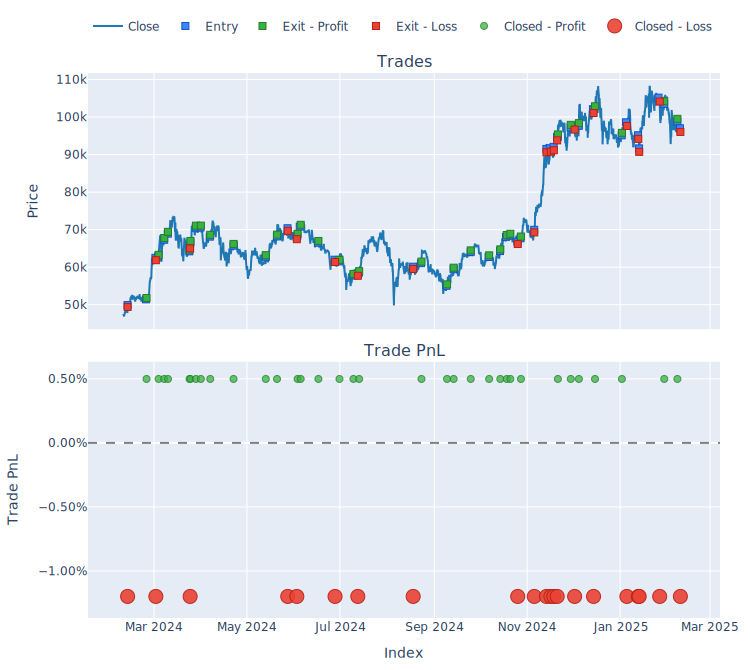

#########################
#########################
ETHUSDT


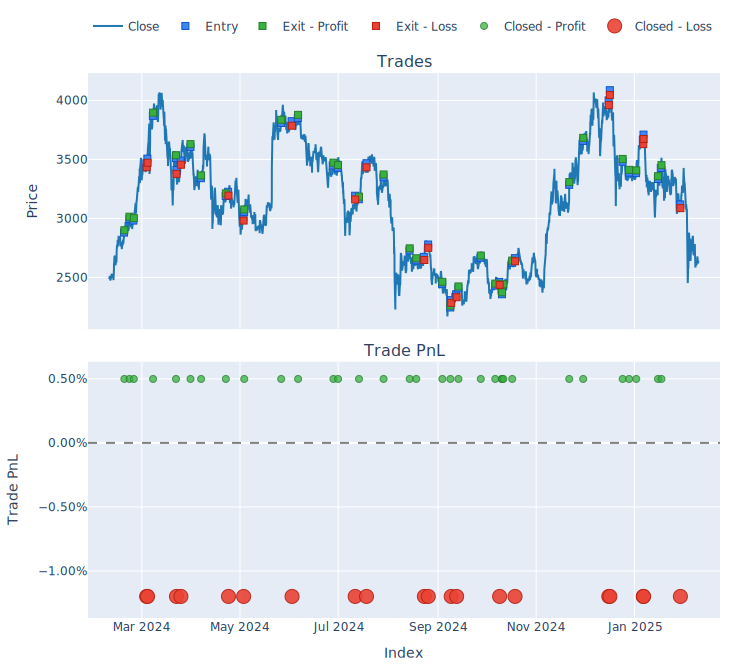

#########################
#########################
SOLUSDT


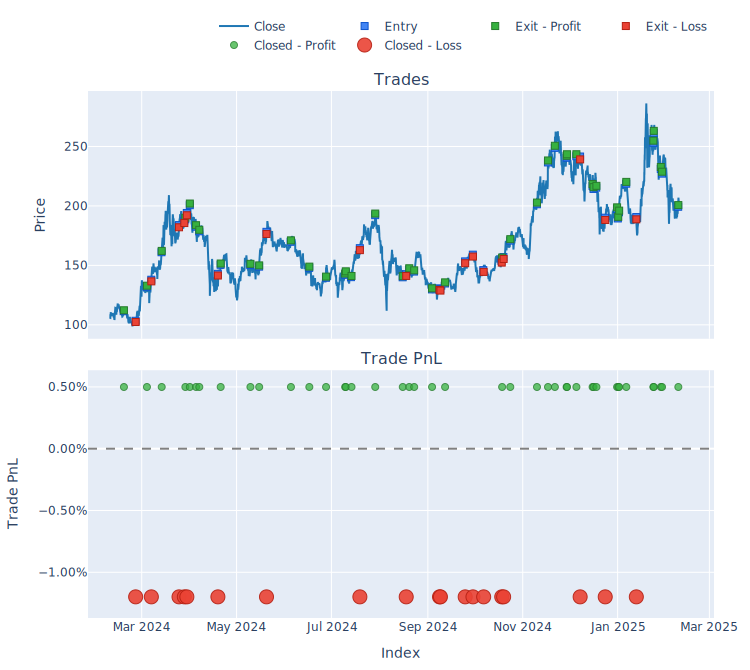

#########################
#########################
BNBUSDT


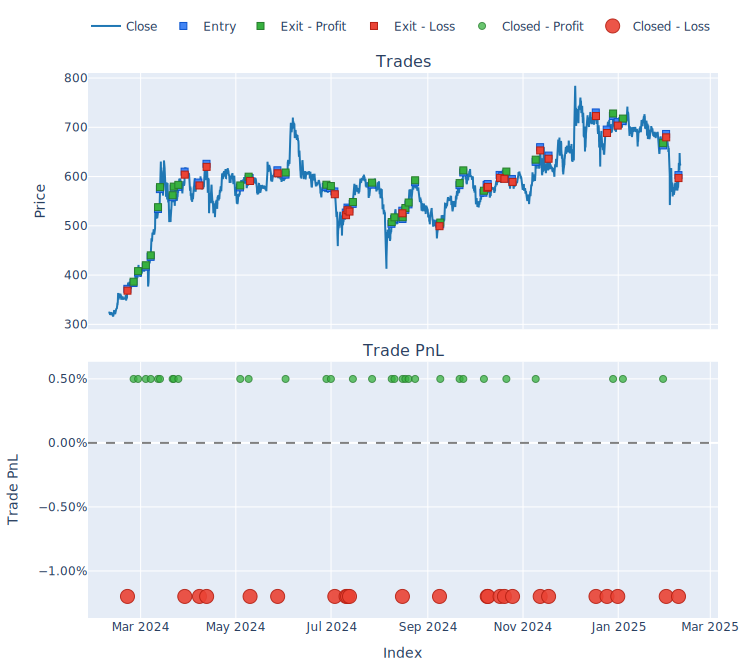

#########################
#########################
SUIUSDT


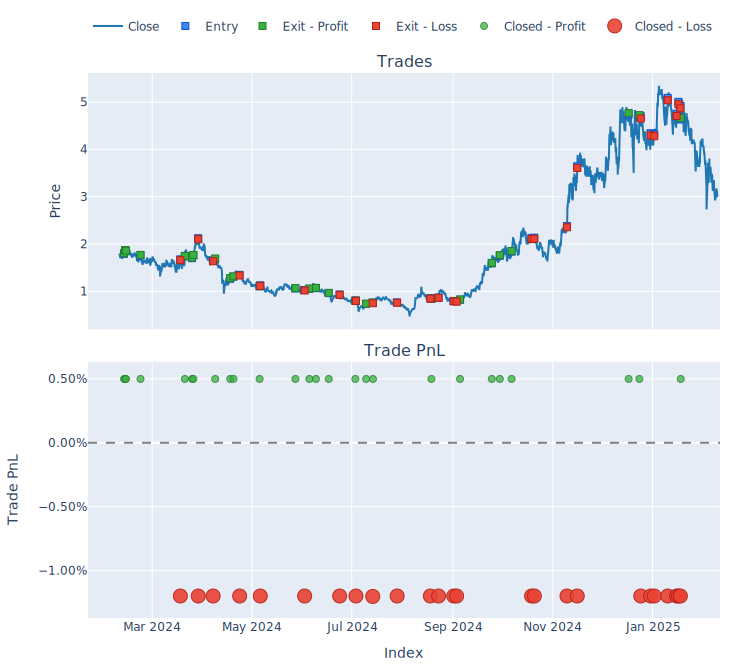

#########################
#########################
DOGEUSDT


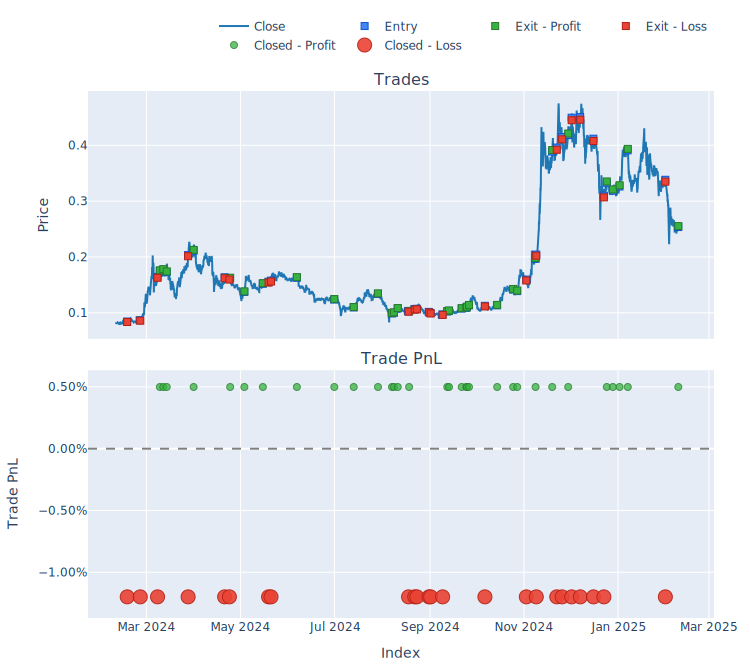

#########################
#########################
ADAUSDT


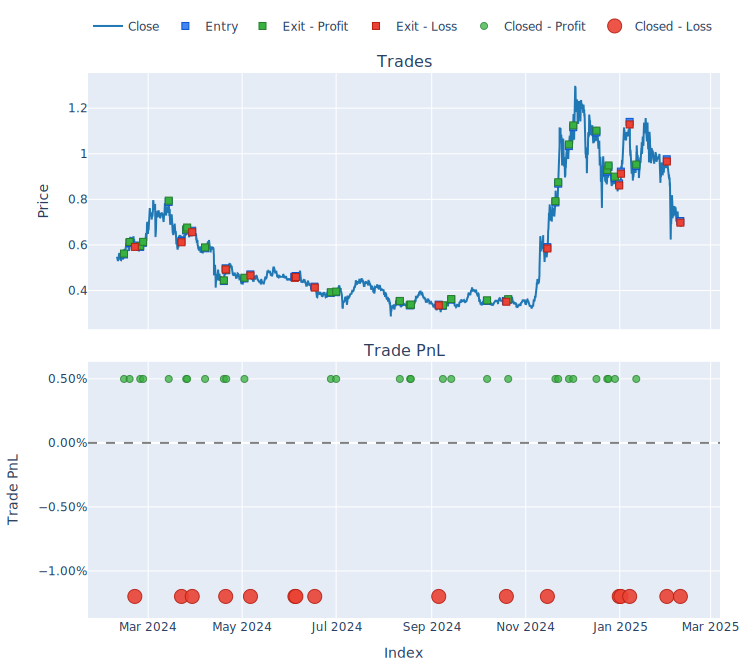

#########################
#########################
XRPUSDT


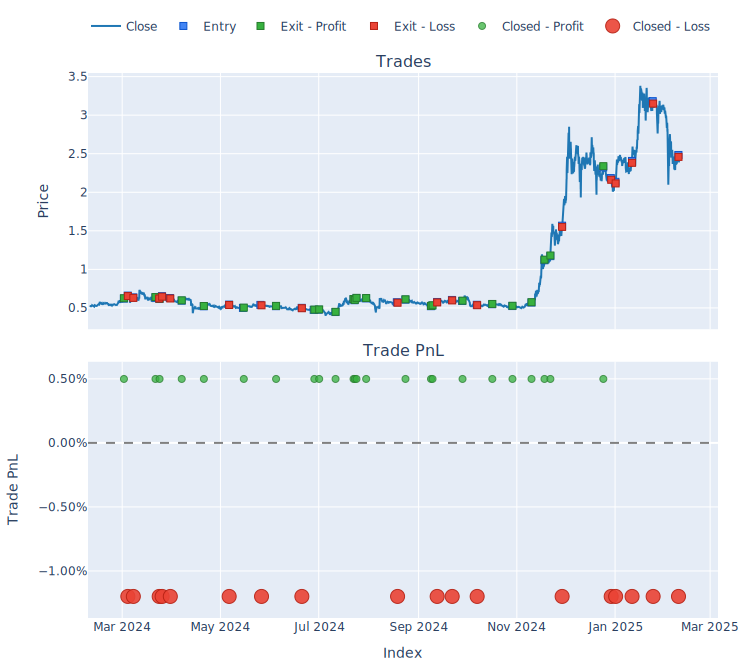

#########################
#########################
LINKUSDT


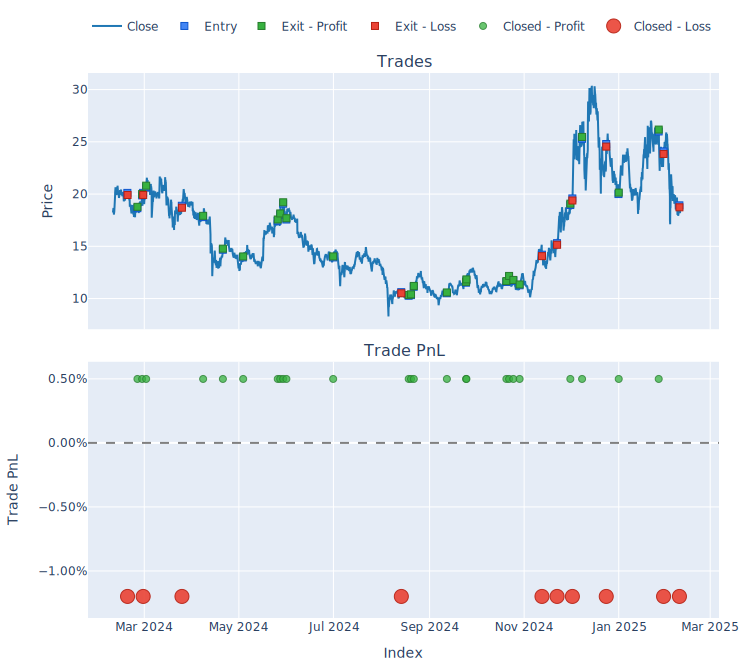

#########################


In [ ]:
idxs = [0]
for idx in idxs:
   for symbol in symbols:
      pf = pf_dict[symbol].copy()
      print("#########################")
      # print(symbol)
      # pf[joined_best_df.index[idx]].plot_cum_returns().show_svg()
      print(symbol)
      pf.trades[joined_best_df.index[idx]].plots(settings=dict(plot_zones=False)).show_svg()
      print("#########################")